# Importing libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_roc_curve, accuracy_score, precision_score, \
recall_score, f1_score, precision_recall_curve, auc, classification_report, accuracy_score, plot_confusion_matrix, \
ConfusionMatrixDisplay
# !pip install scikit-plot
import scikitplot as skplt
from mlxtend.evaluate import lift_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import preprocessing

# EDA

In [2]:
# Reading data
data = pd.read_csv("DSA_Data_Set.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


#### Information about dataframe

In [3]:
data.shape

(41188, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


#### Model Predictions as 'yes' or 'no'

'Yes' = 40240

'No' = 936

In [6]:
data.loc[data['ModelPrediction'] >= 0.5, 'y'].count()

40251

In [7]:
data.loc[data['ModelPrediction'] < 0.5, 'y'].count()

937

### Missing Data

There are no missing values

In [8]:
data.isnull().values.any()

False

In [9]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [10]:
data.replace("unknown", np.nan).isnull().sum() # Make it inplace and uncomment next block if you want to remove unknown values

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
ModelPrediction       0
y                     0
dtype: int64

In [11]:
# Dropping unknown values would depend on the model being used. 10k rows with missing values.

# data.dropna(inplace = True)
# data.shape

In [12]:
(data == 0).sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               4
campaign               0
pdays                 15
previous           35563
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
ModelPrediction        0
y                      0
dtype: int64

### Duplicate Data

There were 12 duplicate rows which were removed.

In [13]:
data.duplicated().sum()

12

In [14]:
duplicate = data.duplicated()
data[duplicate]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(41176, 22)

## Transforming data:

#### Removing the following columns:


- Model prediction

- Duration (Though there are only 4 records with 0 duration, but as suggested in the dataset description, duration doesn't contribute while making a prediction)

In [18]:
data.loc[data['duration'] == 0]['y'].count()

4

In [19]:
# Storing model probabilities
probs = data['ModelPrediction']
probs.head()

0    0.932750
1    0.953579
2    0.945724
3    0.933875
4    0.940996
Name: ModelPrediction, dtype: float64

In [20]:
# Dropping the probabilities from the dataframe
data.drop('ModelPrediction', axis = 1, inplace = True)
data.shape

(41176, 21)

In [21]:
# Storing call durations
duration = data['duration']
duration.head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [22]:
# Dropping call duration from the dataframe
data.drop('duration', axis = 1, inplace = True)
data.shape

(41176, 20)

#### Encoding target column.

In [23]:
# Label encoding the target column and storing it as labels.
# 1 = 'yes'
# 0 = 'no'

le = preprocessing.LabelEncoder()
le.fit(data['y'])
data['y'] = le.transform(data['y'])
labels = data['y']

In [24]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### Selecting numerical and categorical features.

#### Encoding categorical features.

#### Scaling numerical features.

In [25]:
# Numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [26]:
# Scaling numerical columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data[num_cols])
data[num_cols] = pd.DataFrame(scaled_df, columns = num_cols)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,0
1,1.629107,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,0
2,-0.290177,services,married,high.school,no,yes,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,0
3,-0.002284,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,0
4,1.533143,services,married,high.school,no,no,yes,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,0.648101,0.722628,0.886568,0.712463,0.331695,0


In [27]:
# Categorical features
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [28]:
transformed_df = pd.get_dummies(data, columns = cat_cols)
transformed_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,0,0,0,1,0,0,0,0,1,0
1,1.629107,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.290177,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.002284,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,0,0,0,1,0,0,0,0,1,0
4,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
transformed_df.drop('y', axis = 1, inplace = True)
transformed_df.shape

(41176, 62)

In [30]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41164 non-null  float64
 1   campaign                       41164 non-null  float64
 2   pdays                          41164 non-null  float64
 3   previous                       41164 non-null  float64
 4   emp.var.rate                   41164 non-null  float64
 5   cons.price.idx                 41164 non-null  float64
 6   cons.conf.idx                  41164 non-null  float64
 7   euribor3m                      41164 non-null  float64
 8   nr.employed                    41164 non-null  float64
 9   job_admin.                     41176 non-null  uint8  
 10  job_blue-collar                41176 non-null  uint8  
 11  job_entrepreneur               41176 non-null  uint8  
 12  job_housemaid                  41176 non-null 

### Data distribution

Imbalanced dataset with only around 11% of the data belonging to "yes" class.

#### Sampling techniques are required to be used to handle class imbalance.

Subscribed:  11.266271614532737 %
Not Subscribed:  88.73372838546726 %


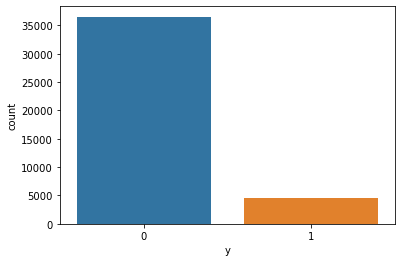

In [31]:
sns.countplot(x = data['y'])
print('Subscribed: ',len(data[data['y']==1])/len(data['y'])*100,"%")
print('Not Subscribed: ',len(data[data['y']==0])/len(data['y'])*100,"%")
plt.savefig('Imbalance.png', dpi=300, bbox_inches='tight')

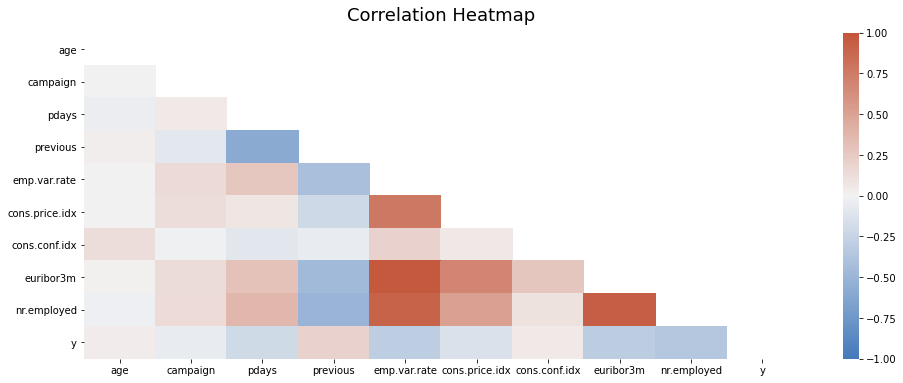

In [32]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask = mask, vmin=-1, vmax=1, cmap=sns.diverging_palette(250, 20, as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Distribution of Data based on various categorical features

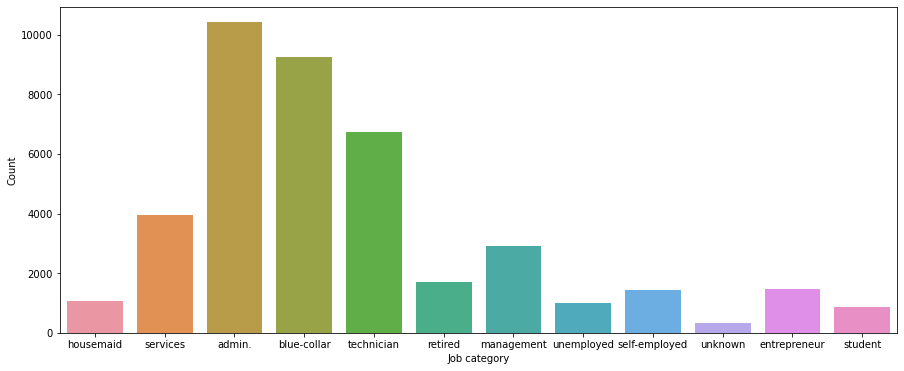

In [33]:
plt.figure(figsize=(15, 6))
sns.countplot(x = data['job'])
plt.xlabel("Job category")
plt.ylabel("Count")
plt.savefig('JobHist.png', dpi=300, bbox_inches='tight')

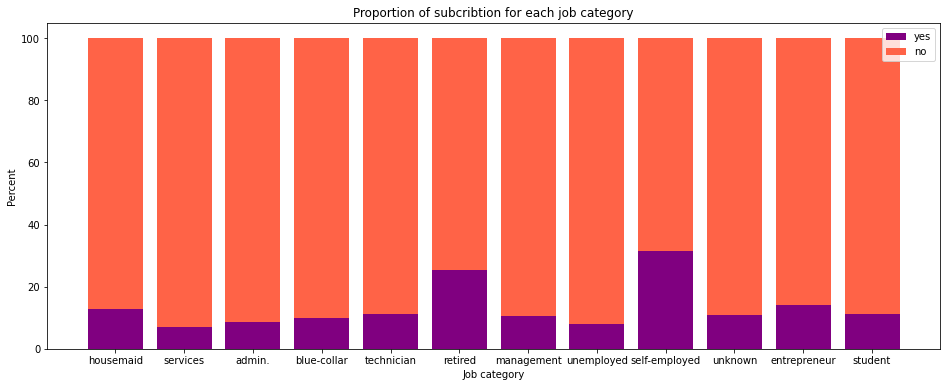

In [34]:
percentyes = np.array(data[data.y == 1].job.value_counts() / data.job.value_counts())
percentno = np.array(data[data.y == 0].job.value_counts() / data.job.value_counts())

totals = [i+j for i,j in zip(percentno, percentyes)]
no = [i / j * 100 for i,j in zip(percentno, totals)]
yes = [i / j * 100 for i,j in zip(percentyes, totals)]

plt.figure(figsize=(16, 6))
plt.bar(data['job'].unique(), yes, color = 'purple', label = 'yes')
plt.bar(data['job'].unique(), no, bottom=yes, color = 'tomato', label = 'no')
plt.title("Proportion of subcribtion for each job category")
plt.xlabel("Job category")
plt.ylabel("Percent")
plt.legend()
plt.show()

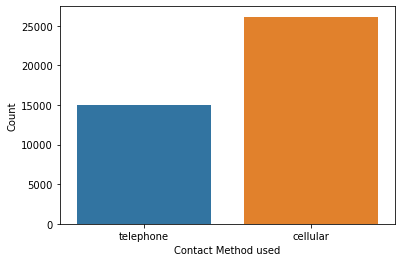

In [35]:
sns.countplot(x = data['contact'])
plt.xlabel("Contact Method used")
plt.ylabel("Count")
plt.savefig('Contact.png', dpi=300, bbox_inches='tight')

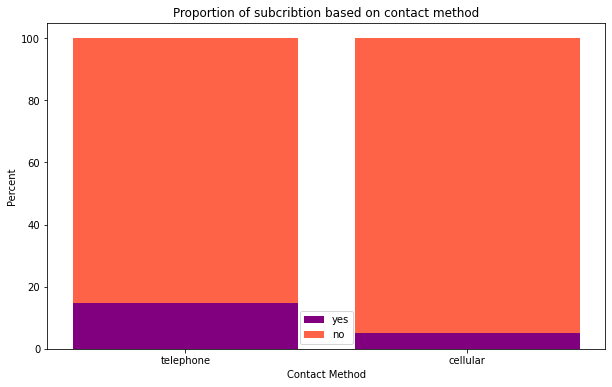

In [36]:
percentyes = np.array(data[data.y == 1].contact.value_counts() / data.contact.value_counts())
percentno = np.array(data[data.y == 0].contact.value_counts() / data.contact.value_counts())

totals = [i+j for i,j in zip(percentno, percentyes)]
no = [i / j * 100 for i,j in zip(percentno, totals)]
yes = [i / j * 100 for i,j in zip(percentyes, totals)]

plt.figure(figsize=(10, 6))

plt.bar(data['contact'].unique(), yes, color = 'purple', label = 'yes')
plt.bar(data['contact'].unique(), no, bottom=yes, color = 'tomato', label = 'no')
plt.title("Proportion of subcribtion based on contact method")
plt.xlabel("Contact Method")
plt.ylabel("Percent")
plt.legend()
plt.show()

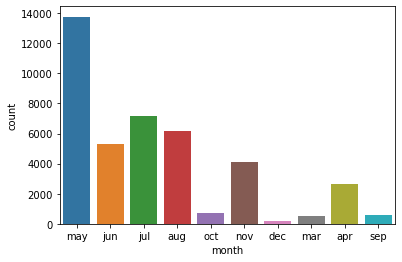

In [37]:
sns.countplot(x = data['month'])
plt.savefig('month.png', dpi=300, bbox_inches='tight')

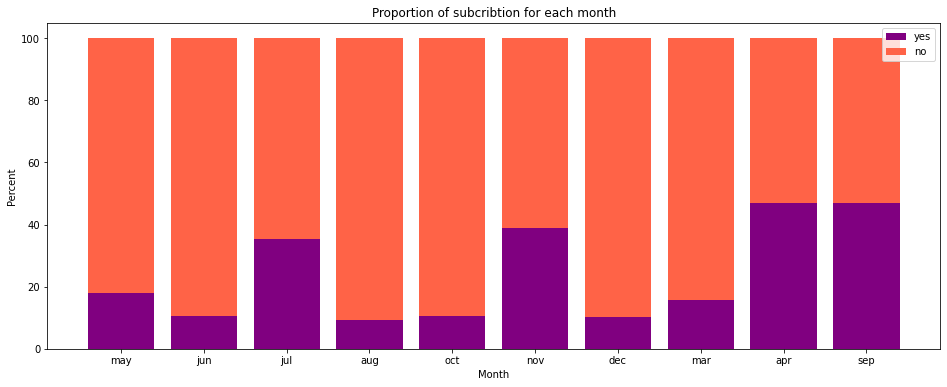

In [38]:
percentyes = np.array(data[data.y == 1].month.value_counts() / data.month.value_counts())
percentno = np.array(data[data.y == 0].month.value_counts() / data.month.value_counts())

totals = [i+j for i,j in zip(percentno, percentyes)]
no = [i / j * 100 for i,j in zip(percentno, totals)]
yes = [i / j * 100 for i,j in zip(percentyes, totals)]

plt.figure(figsize=(16, 6))

plt.bar(data['month'].unique(), yes, color = 'purple', label = 'yes')
plt.bar(data['month'].unique(), no, bottom=yes, color = 'tomato', label = 'no')
plt.title("Proportion of subcribtion for each month")
plt.xlabel("Month")
plt.ylabel("Percent")
plt.legend()
plt.show()

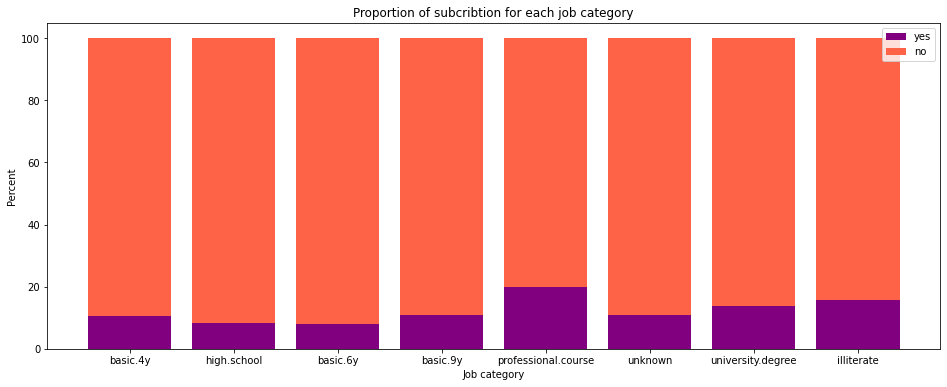

In [39]:
percentyes = np.array(data[data.y == 1].education.value_counts() / data.education.value_counts())
percentno = np.array(data[data.y == 0].education.value_counts() / data.education.value_counts())

totals = [i+j for i,j in zip(percentno, percentyes)]
no = [i / j * 100 for i,j in zip(percentno, totals)]
yes = [i / j * 100 for i,j in zip(percentyes, totals)]

plt.figure(figsize=(16, 6))

plt.bar(data['education'].unique(), yes, color = 'purple', label = 'yes')
plt.bar(data['education'].unique(), no, bottom=yes, color = 'tomato', label = 'no')
plt.title("Proportion of subcribtion for each job category")
plt.xlabel("Job category")
plt.ylabel("Percent")
plt.legend()
plt.show()

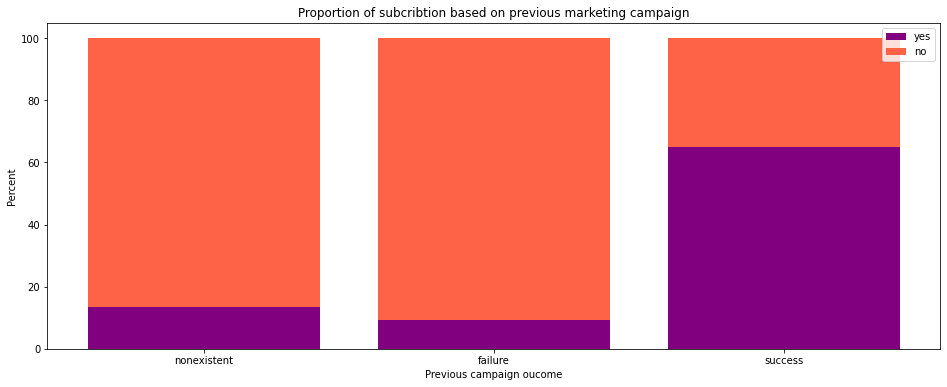

In [40]:
percentyes = np.array(data[data.y == 1].poutcome.value_counts() / data.poutcome.value_counts())
percentno = np.array(data[data.y == 0].poutcome.value_counts() / data.poutcome.value_counts())

totals = [i+j for i,j in zip(percentno, percentyes)]
no = [i / j * 100 for i,j in zip(percentno, totals)]
yes = [i / j * 100 for i,j in zip(percentyes, totals)]

plt.figure(figsize=(16, 6))

plt.bar(data['poutcome'].unique(), yes, color = 'purple', label = 'yes')
plt.bar(data['poutcome'].unique(), no, bottom=yes, color = 'tomato', label = 'no')
plt.title("Proportion of subcribtion based on previous marketing campaign")
plt.xlabel("Previous campaign oucome")
plt.ylabel("Percent")
plt.legend()
plt.show()

# Prediction

In [44]:
# Generating predictions from probabilities
pred = np.where(probs >= 0.50, 1, 0)

In [41]:
# Log loss
loss = log_loss(labels, probs)
loss

2.440808074205988

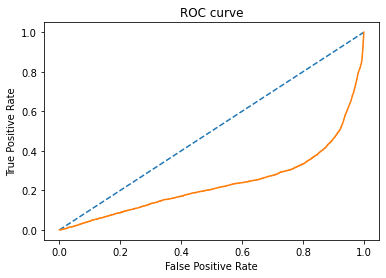

In [42]:
# Getting the ROC plot
fpr, tpr, thresholds = roc_curve(labels, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.savefig('roc.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# Accuracy -> not a good measure
accuracy = round(accuracy_score(labels,pred),3)
print("Accuracy = ", accuracy)

Accuracy =  0.102


In [46]:
# Other relevant metrics based on predictions

precision = round(precision_score(labels,pred),3)
recall = round(recall_score(labels,pred),3)
f1 = round(f1_score(labels,pred),3)
roc = round(roc_auc_score(labels,probs),3)

In [47]:
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)
print("ROC = ", roc)

Precision =  0.098
Recall =  0.853
F1 =  0.176
ROC =  0.235


In [48]:
# Lift score
lift_score(labels, pred)

0.8732675299785679

In [49]:
# Classification report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.27      0.01      0.01     36537
           1       0.10      0.85      0.18      4639

    accuracy                           0.10     41176
   macro avg       0.19      0.43      0.10     41176
weighted avg       0.25      0.10      0.03     41176



[[ 3959   680]
 [36281   256]]


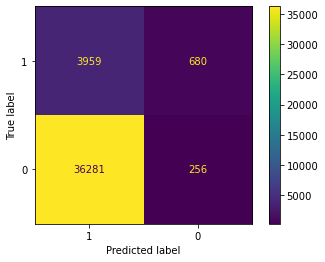

In [51]:
# Confusion Matrix
y = [1, 0]
cm = confusion_matrix(labels, pred, y)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,0])
cmd.plot()
plt.savefig('cm.png', dpi=300, bbox_inches='tight')

In [52]:
tn, fp, fn, tp = confusion_matrix(labels, pred).ravel()

In [53]:
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)
print("TP = ", tp)

TN =  256
FP =  36281
FN =  680
TP =  3959


### Modeling using XgBoost

In [70]:
# Params for hyperparameter tuning
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [7,14,21,49]        }

In [57]:
# Defining the classifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [71]:
# Tuning hyperparameters
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

X = transformed_df
Y = labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1, stratify = Y)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

# Here we go
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.4min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E5CB784B10>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'scale_pos_weight': [7, 14, 21, 49],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [60]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([15.97506483, 16.50399852, 19.36424192, 17.07502778, 18.85328825]), 'std_fit_time': array([0.03820925, 0.34210195, 0.09017106, 0.11231212, 0.09467212]), 'mean_score_time': array([0.1819822 , 0.24531698, 0.18885509, 0.25352979, 0.20302916]), 'std_score_time': array([0.00851507, 0.0066186 , 0.00799187, 0.00254367, 0.03002055]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_scale_pos_weight': masked_array(data=[7, 14, 7, 49, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 10, 10, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 4, 3, 4, 4],
             mask=[False, False, False, False, False],
       fill_value='

#### XgBoost model

In [76]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, labels, test_size=0.2, random_state=42)

In [62]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier()

In [63]:
y_pred = xg.predict(X_test)
predictions = [round(value) for value in y_pred]

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.69      0.22      0.33       971

    accuracy                           0.90      8236
   macro avg       0.80      0.60      0.64      8236
weighted avg       0.88      0.90      0.87      8236



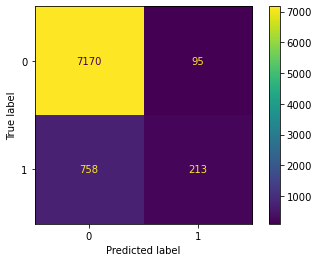

In [65]:
plot_confusion_matrix(xg, X_test, y_test)

#### XgBoost with tuned hyperparameters

In [66]:
xg1 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, subsample = 0.8, scale_pos_weight = 7, min_child_weight= 10, max_depth = 3, gamma = 1, colsample_bytree = 1)
xg1.fit(X_train, y_train)

XGBClassifier(gamma=1, learning_rate=0.02, min_child_weight=10,
              n_estimators=600, nthread=1, scale_pos_weight=7, silent=True,
              subsample=0.8)

In [67]:
y_pred1 = xg1.predict(X_test)
predictions1 = [round(value) for value in y_pred1]

In [68]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7265
           1       0.40      0.62      0.48       971

    accuracy                           0.84      8236
   macro avg       0.67      0.75      0.70      8236
weighted avg       0.88      0.84      0.86      8236



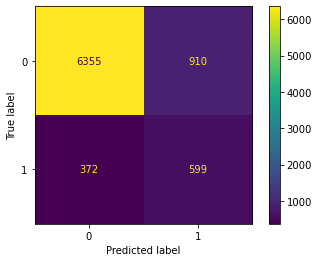

In [69]:
plot_confusion_matrix(xg1, X_test, y_test)

In [77]:
precision = round(precision_score(y_test,predictions1),3)
recall = round(recall_score(y_test,predictions1),3)
f1 = round(f1_score(y_test,predictions1),3)

print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)

Precision =  0.397
Recall =  0.617
F1 =  0.483


In [78]:
lift_score(y_test, predictions1)

3.366934677550898